<h1>Notebook para Pseudomonas </h1>

In [15]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns
from statistics import mode
import multiprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
# from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed

from module_functions import *

<h2>Se extrae la información </h2>

In [16]:
info=pd.read_csv('data/pscpPseudo.blast',sep='\t',header=None)
minimum_score=100
info=info[info[11]>=minimum_score]
info.reset_index(drop=True,inplace=True)
info=info.loc[:,0:1]
names=pd.read_csv('data/Pseudomonas.ids',sep='\t',dtype='object',header=None)

<h2>Se crean los data frames</h2>

In [17]:
info_by_pathway_and_genomes_directions=get_info_by_pathway_and_all_genomes_directions(info)
df_by_pathway,df_by_pathway_drop_duplicate,representative_genomes=get_df_by_pathway(info_by_pathway_and_genomes_directions)


<h2> Se crea el complejo simplicial</h2>

In [4]:
complex_pathways=get_complex_by_pathways(df_by_pathway_drop_duplicate)

In [5]:
#plot_all_bar_code_pathways(complex_pathways)

<h2>Se buscan los uno hoyos</h2>

In [6]:
holes_by_pathway=change_vertex_to_name_per_path(df_by_pathway_drop_duplicate,holes_pathway_pseudo(),names,representative_genomes)

In [7]:
holes_by_pathway['calcium-dependent-antibiotic']=[]
holes_by_pathway['polyketide']=[]

In [8]:
resum=get_resum_df(df_by_pathway,complex_pathways,holes_by_pathway)
resum

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
calcium-dependent-antibiotic,1,0,[],[],[]
polyketide,1,0,[],[],[]
3PGA_AMINOACIDS,2,9,[[[Pseudomonas aeruginosa str. Stone 130 AQFN0...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
ALPHAKETOGLUTARATE_AMINOACIDS,12,46,[[[Pseudomonas aeruginosa str. Stone 130 AQFN0...,"[[[Pseudomonas, Pseudomonas, Pseudomonas], [Ps...",[1.0]
E4P_AMINO_ACIDS,7,6,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
Glycolysis,3,2,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
OXALACETATE_AMINOACIDS,5,54,"[[[Pseudomonas deceptionensis JYKX01, Pseudomo...","[[[Pseudomonas, Pseudomonas, Pseudomonas], [Ps...",[1.0]
PYR_THR_AA,6,51,"[[[Pseudomonas monteilii QM AHGZ01, Pseudomona...","[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
R5P_AMINOACIDS,5,8,[[[Pseudomonas monteilii NBRC 103158 = DSM 141...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
TCA,3,4,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]


In [10]:
ciclo=resum.loc['R5P_AMINOACIDS','ciclos'][0]
elementos_ciclo=[]
for i in ciclo:
    if type(i)==str:
        elementos_ciclo.append(i)
    else:
        elementos_ciclo.append(i[0])
elementos_ciclo

['Pseudomonas monteilii NBRC 103158 = DSM 14164 JHYV01',
 'Pseudomonas brassicacearum subsp. brassicacearum NFM421 NC_015379.1',
 'Pseudomonas alkylphenolia KL28',
 'Pseudomonas taeanensis ms-3 AWSQ01']

In [11]:
traduced_df(df_by_pathway_drop_duplicate['R5P_AMINOACIDS'],names).loc[elementos_ciclo]

,ribosephosphate_pyrophosphokinase,imidazoleglycerol_phosphate_dehydratase,imidazole_glycerol_phosphate_synthase_H,phosphoribosyl_isomerase_A,histidinol_dehydrogenase
R5P_AMINOACIDS,,,,,
Pseudomonas monteilii NBRC 103158 = DSM 14164 JHYV01,2,1,3,2,1
Pseudomonas brassicacearum subsp. brassicacearum NFM421 NC_015379.1,2,1,5,2,1
Pseudomonas alkylphenolia KL28,2,1,3,2,2
Pseudomonas taeanensis ms-3 AWSQ01,2,1,5,2,2


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

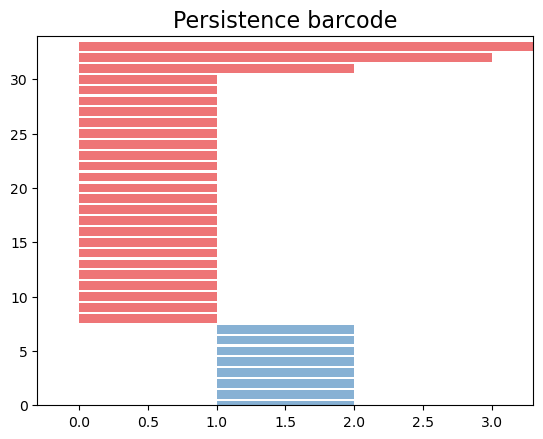

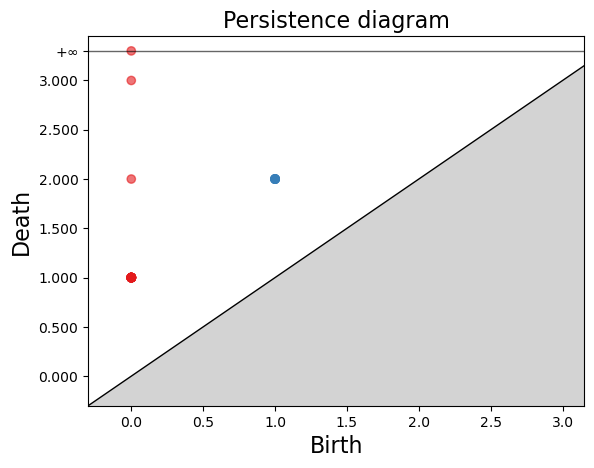

In [46]:
gd.plot_persistence_barcode(complex_pathways['R5P_AMINOACIDS'][0])
gd.plot_persistence_diagram(complex_pathways['R5P_AMINOACIDS'][0])

In [12]:
visualize_simplicial_complex(complex_pathways['R5P_AMINOACIDS'][1],1,'R5P_AMINOACIDS','Pseudomonas')

plotly.graph_objs._figure.Figure

<h2>Se buscan uno hoyos pero al separar por genero y ruta metabólica</h2>

In [13]:
df_by_genus_pathway,df_by_genus_pathway_drop_duplicate,representative_genomes_genus_pathway=get_df_by_genus_pathway(df_by_pathway,names)
complex_genus_pathways=get_complex_by_pathways(df_by_genus_pathway_drop_duplicate)

In [14]:
holes_by_genus_pathway=get_holes_by_pathways(complex_genus_pathways,df_by_genus_pathway_drop_duplicate,names,representative_genomes_genus_pathway)

se buscan ciclos en el tiempo 2.0 para Pseudomonas_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Pseudomonas_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Pseudomonas_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 2.0 para Pseudomonas_Glycolysis
Se encontró el ciclo [4, 5, 2, 0] en el tiempo 1.0 para Pseudomonas_Glycolysis
Se encontró el ciclo [3, 1, 2, 0] en el tiempo 1.0 para Pseudomonas_Glycolysis
se buscan ciclos en el tiempo 2.0 para Pseudomonas_OXALACETATE_AMINOACIDS
Se encontró el ciclo [8, 7, 6, 0] en el tiempo 1.0 para Pseudomonas_E4P_AMINO_ACIDS
Se encontró el ciclo [4, 13, 2, 0] en el tiempo 1.0 para Pseudomonas_E4P_AMINO_ACIDS
Se encontró el ciclo [6, 3, 1, 0] en el tiempo 1.0 para Pseudomonas_E4P_AMINO_ACIDS
Se encontró el ciclo [13, 14, 10, 2] en el tiempo 1.0 para Pseudomonas_E4P_AMINO_ACIDS
Se encontró el ciclo [6, 5, 4, 0] en el tiempo 1.0 para Pseudomonas_E4P_AMINO_ACIDS
Se encontró el ciclo [8, 12, 1, 0] en el tiempo 1.0 para Pseudomona

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
resum_genus=get_resum_df(df_by_genus_pathway,complex_genus_pathways,holes_by_genus_pathway)
resum_genus

Se encontró el ciclo [106, 91, 36, 4] en el tiempo 3.0 para Pseudomonas_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [75, 83, 6, 4] en el tiempo 3.0 para Pseudomonas_ALPHAKETOGLUTARATE_AMINOACIDS
